# Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from functions import functions as f
# import model
from sklearn.neighbors import KNeighborsClassifier

# Import data

In [2]:
df = pd.read_csv('../data/crashes_cleaned_ohe.csv')

In [3]:
df.head()

,posted_speed_limit,num_units,sex,age,weather_condition_clear,weather_condition_cloudy/overcast,weather_condition_fog/smoke/haze,weather_condition_freezing rain/drizzle,weather_condition_rain,weather_condition_severe cross wind gate,...,crash_month_4,crash_month_5,crash_month_6,crash_month_7,crash_month_8,crash_month_9,crash_month_10,crash_month_11,crash_month_12,serious_accident
0,35,2,1,44.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,25,2,1,71.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15,2,1,60.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,2,1,38.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,2,1,52.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split

In [4]:
X = df.drop(['serious_accident'], axis=1)
y = df.serious_accident

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [5]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Balance the imbalaced data

In [6]:
balance = SMOTE()
X_train_scaled_balanced, y_train_balanced = balance.fit_sample(X_train_scaled, y_train)

# Run Model

In [7]:
clf = KNeighborsClassifier()
clf.fit(X_train_scaled_balanced, y_train_balanced)

KNeighborsClassifier()

# Predict

In [8]:
predictions_from_X_train = clf.predict(X_train_scaled_balanced)
predictions_from_X_test = clf.predict(X_test_scaled)

# Scoring

## Train Scoring

Accuracy: 97.4%
Precision: 95.2%
Recall: 99.9%
F1: 97.5%
Conufusion Matrix: 
[[41558  2202]
 [   37 43723]]




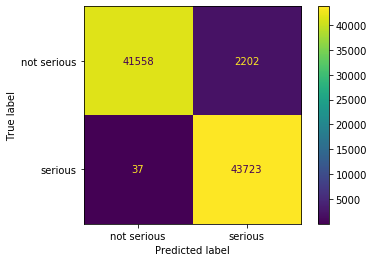

In [14]:
f.scoring(predictions_from_X_train, y_train_balanced, clf, X_train_scaled_balanced)

## Test Scoring

Accuracy: 90.6%
Precision: 2.4%
Recall: 9.6%
F1: 3.8%
Conufusion Matrix: 
[[10073   853]
 [  197    21]]




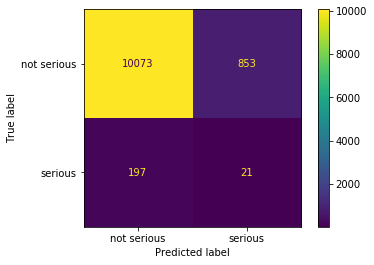

In [15]:
f.scoring(predictions_from_X_test, y_test, clf, X_test_scaled)